CSV loaded with 569 rows and 33 columns.


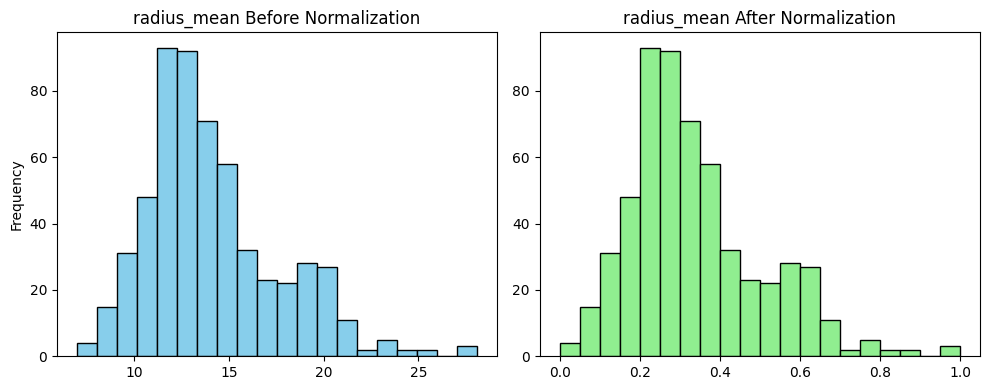

Interpretation: Post-scaling, values are bounded [0,1] with preserved shape.


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load CSV
data_dir = "/content/data"
os.makedirs(data_dir, exist_ok=True)

csv_path = f"{data_dir}/Breast_cancer_dataset.csv"
if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV file not found at {csv_path}")

labels_df = pd.read_csv(csv_path)
print(f"CSV loaded with {len(labels_df)} rows and {len(labels_df.columns)} columns.")

# Feature to scale
feature = 'radius_mean'

# Check if feature exists
if feature not in labels_df.columns:
    raise KeyError(f"Column '{feature}' not found in dataset. Available columns: {labels_df.columns.tolist()}")

# Handle missing values (instead of dropping everything)
labels_df[feature] = labels_df[feature].fillna(labels_df[feature].mean())

# Normalize
scaler = MinMaxScaler()
labels_df[f'{feature}_scaled'] = scaler.fit_transform(labels_df[[feature]])

# EDA Visualization
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(labels_df[feature], bins=20, color="skyblue", edgecolor="black")
plt.title(f'{feature} Before Normalization')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(labels_df[f'{feature}_scaled'], bins=20, color="lightgreen", edgecolor="black")
plt.title(f'{feature} After Normalization')

plt.tight_layout()
plt.show()

print('Interpretation: Post-scaling, values are bounded [0,1] with preserved shape.')
